In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# -------------------------------
# Load Dataset
# -------------------------------
df = pd.read_csv("aadhaar_updates.csv")

df['date'] = pd.to_datetime(df['date'])

# Filter Maharashtra
mh = df[df['state'] == 'Maharashtra'].sort_values('date').reset_index(drop=True)

# -------------------------------
# Create Time Index
# -------------------------------
mh['month_index'] = np.arange(len(mh))

X = mh[['month_index']]
y = mh['total_updates']

# -------------------------------
# Train-Test Split (80-20)
# -------------------------------
split = int(0.8 * len(mh))

X_train = X.iloc[:split]
X_test = X.iloc[split:]

y_train = y.iloc[:split]
y_test = y.iloc[split:]

# -------------------------------
# Train Linear Regression Model
# -------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mae_percent = (mae / y_test.mean()) * 100

print(f"MAE: {mae:.2f}")
print(f"MAE Percentage: {mae_percent:.2f}%")

# -------------------------------
# Forecast Next 6 Months
# -------------------------------
future_months = 6
last_index = mh['month_index'].iloc[-1]

future_index = np.arange(last_index + 1, last_index + 1 + future_months)
future_predictions = model.predict(future_index.reshape(-1, 1))

future_dates = pd.date_range(
    start=mh['date'].iloc[-1],
    periods=future_months + 1,
    freq='M'
)[1:]

# -------------------------------
# Line Plot (NO DOTS)
# -------------------------------
plt.figure(figsize=(11, 5))

plt.plot(mh['date'], y, linewidth=2, label='Actual Updates')
plt.plot(mh['date'].iloc[split:], y_pred, linewidth=2, label='Predicted (Test)')
plt.plot(future_dates, future_predictions, linestyle='--', linewidth=2, label='Forecast')

plt.xlabel("Month")
plt.ylabel("Total Aadhaar Updates")
plt.title("Actual vs Predicted Aadhaar Update Load – Maharashtra")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'aadhaar_updates.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# -------------------------------
# Load Excel Dataset (CORRECT PATH)
# -------------------------------
df = pd.read_excel("../data/demographic_final.xlsx")

# -------------------------------
# Inspect columns once (IMPORTANT)
# -------------------------------
print(df.columns)


FileNotFoundError: [Errno 2] No such file or directory: '../data/demographic_final.xlsx'

In [3]:
import os

print("Current working directory:")
print(os.getcwd())

print("\nFiles visible here:")
print(os.listdir())


Current working directory:
C:\Users\Dell\OneDrive\Desktop\Projects\UIDAI_ALEIF\notebook

Files visible here:
['.ipynb_checkpoints', 'aadhaar_analysis.ipynb', 'aadhaar_forecast_validation.ipynb', 'stress_forecast.ipynb']


In [4]:
df = pd.read_excel(
    r"C:\Users\Dell\OneDrive\BANSARI - Personal\Desktop\Projects\UIDAI_ALEIF\data\demographic_final.xlsx"
)

print(df.columns)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Dell\\OneDrive\\BANSARI - Personal\\Desktop\\Projects\\UIDAI_ALEIF\\data\\demographic_final.xlsx'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# -------------------------------
# Load CSV Dataset (CORRECT)
# -------------------------------
df = pd.read_csv("../data/demographic_final.csv")

print(df.head())
print(df.columns)


         date           state    district  pincode  demo_age_5_17  \
0  01-03-2025   Uttar Pradesh   Gorakhpur   273213             49   
1  01-03-2025  Andhra Pradesh    Chittoor   517132             22   
2  01-03-2025         Gujarat      Rajkot   360006             65   
3  01-03-2025  Andhra Pradesh  Srikakulam   532484             24   
4  01-03-2025       Rajasthan     Udaipur   313801             45   

   demo_age_17_  
0           529  
1           375  
2           765  
3           314  
4           785  
Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')


In [6]:
# Make column names safe
df.columns = df.columns.str.lower().str.strip()

print(df.columns)



Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')


In [7]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create total demographic updates by summing age groups
df['total_demo_updates'] = df['demo_age_5_17'] + df['demo_age_17_']


ValueError: time data "13-09-2025" doesn't match format "%m-%d-%Y", at position 17. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [8]:
# Convert date column to datetime (DD-MM-YYYY format)
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Create total demographic updates
df['total_demo_updates'] = df['demo_age_5_17'] + df['demo_age_17_']


In [9]:
print(df[['date', 'state', 'total_demo_updates']].head())


        date           state  total_demo_updates
0 2025-03-01   Uttar Pradesh                 578
1 2025-03-01  Andhra Pradesh                 397
2 2025-03-01         Gujarat                 830
3 2025-03-01  Andhra Pradesh                 338
4 2025-03-01       Rajasthan                 830


In [10]:
# Filter Maharashtra only
mh = df[df['state'] == 'Maharashtra'].copy()

# Aggregate to monthly state level
mh = (
    mh.groupby(pd.Grouper(key='date', freq='M'))['total_demo_updates']
    .sum()
    .reset_index()
)

mh = mh.sort_values('date').reset_index(drop=True)

print(mh.head())
print(len(mh))


        date  total_demo_updates
0 2025-03-31              712202
1 2025-04-30               62436
2 2025-05-31               90731
3 2025-06-30              107102
4 2025-07-31              133381
10


C:\Users\Dell\AppData\Local\Temp\ipykernel_5712\3619289525.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mh.groupby(pd.Grouper(key='date', freq='M'))['total_demo_updates']


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Create time index
mh['month_index'] = np.arange(len(mh))

X = mh[['month_index']]
y = mh['total_demo_updates']

# Train-test split (80-20)
split = int(0.8 * len(mh))
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict test set
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mae_percent = (mae / y_test.mean()) * 100

print(f"MAE: {mae:.2f}")
print(f"MAE Percentage: {mae_percent:.2f}%")

# Forecast next 6 months
future_months = 6
future_index = np.arange(
    mh['month_index'].iloc[-1] + 1,
    mh['month_index'].iloc[-1] + 1 + future_months
)

future_predictions = model.predict(future_index.reshape(-1, 1))

future_dates = pd.date_range(
    start=mh['date'].iloc[-1],
    periods=future_months + 1,
    freq='M'
)[1:]

# -------------------------------
# SHARP LINE GRAPH (NO DOTS)
# -------------------------------
plt.figure(figsize=(11, 5))

plt.plot(mh['date'], y, linewidth=2, label="Actual Updates")
plt.plot(mh['date'].iloc[split:], y_pred, linewidth=2, label="Predicted (Test)")
plt.plot(future_dates, future_predictions,
         linestyle='--', linewidth=2, label="Forecast")

plt.xlabel("Month")
plt.ylabel("Total Demographic Aadhaar Updates")
plt.title("Actual vs Predicted Aadhaar Update Load – Mahar


SyntaxError: unterminated string literal (detected at line 58) (3766947918.py, line 58)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5712\3858079805.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mh.groupby(pd.Grouper(key='date', freq='M'))['total_demo_updates']


MAE: 1075164.15
MAE Percentage: 75.20%


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Temp\ipykernel_5712\3858079805.py:72: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(


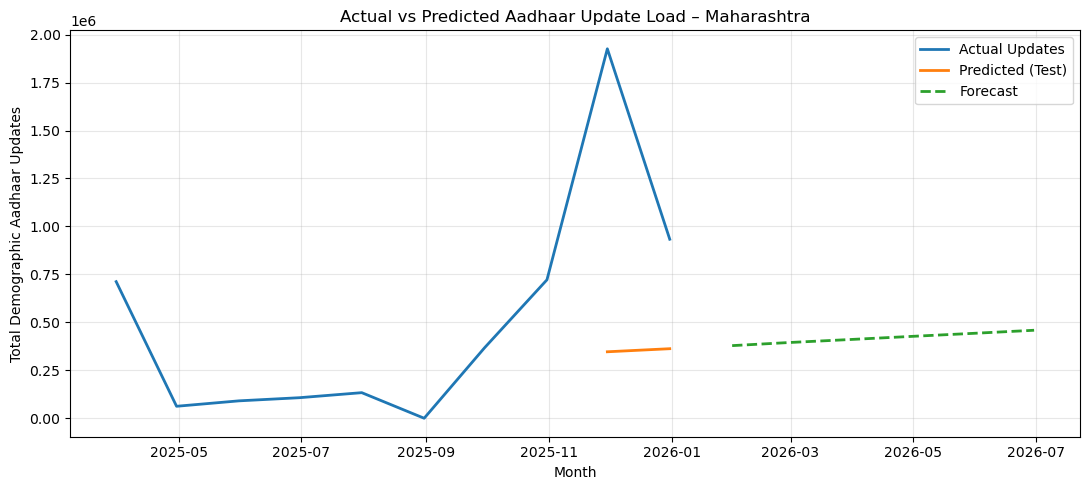

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# -------------------------------
# LOAD DATA
# -------------------------------
df = pd.read_csv("../data/demographic_final.csv")

# Fix column names
df.columns = df.columns.str.lower().str.strip()

# Convert date (DD-MM-YYYY)
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Create total demographic updates
df['total_demo_updates'] = df['demo_age_5_17'] + df['demo_age_17_']

# -------------------------------
# FILTER MAHARASHTRA & AGGREGATE MONTHLY
# -------------------------------
mh = df[df['state'] == 'Maharashtra'].copy()

mh = (
    mh.groupby(pd.Grouper(key='date', freq='M'))['total_demo_updates']
    .sum()
    .reset_index()
)

mh = mh.sort_values('date').reset_index(drop=True)

# -------------------------------
# FORECASTING MODEL
# -------------------------------
mh['month_index'] = np.arange(len(mh))

X = mh[['month_index']]
y = mh['total_demo_updates']

# Train-test split (80-20)
split = int(0.8 * len(mh))
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mae_percent = (mae / y_test.mean()) * 100

print(f"MAE: {mae:.2f}")
print(f"MAE Percentage: {mae_percent:.2f}%")

# -------------------------------
# FORECAST NEXT 6 MONTHS
# -------------------------------
future_months = 6
future_index = np.arange(
    mh['month_index'].iloc[-1] + 1,
    mh['month_index'].iloc[-1] + 1 + future_months
)

future_predictions = model.predict(future_index.reshape(-1, 1))

future_dates = pd.date_range(
    start=mh['date'].iloc[-1],
    periods=future_months + 1,
    freq='M'
)[1:]

# -------------------------------
# SHARP LINE GRAPH (NO DOTS)
# -------------------------------
plt.figure(figsize=(11, 5))

plt.plot(mh['date'], y, linewidth=2, label="Actual Updates")
plt.plot(mh['date'].iloc[split:], y_pred, linewidth=2, label="Predicted (Test)")
plt.plot(
    future_dates,
    future_predictions,
    linestyle='--',
    linewidth=2,
    label="Forecast"
)

plt.xlabel("Month")
plt.ylabel("Total Demographic Aadhaar Updates")
plt.title("Actual vs Predicted Aadhaar Update Load – Maharashtra")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


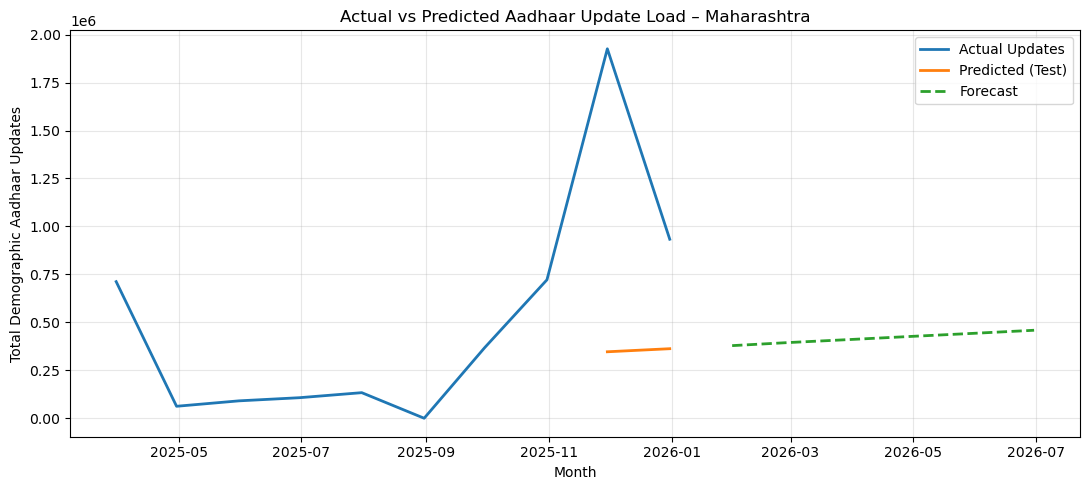

In [13]:
plt.figure(figsize=(11, 5))

plt.plot(mh['date'], y, linewidth=2, label="Actual Updates")
plt.plot(mh['date'].iloc[split:], y_pred, linewidth=2, label="Predicted (Test)")
plt.plot(
    future_dates,
    future_predictions,
    linestyle='--',
    linewidth=2,
    label="Forecast"
)

plt.xlabel("Month")
plt.ylabel("Total Demographic Aadhaar Updates")
plt.title("Actual vs Predicted Aadhaar Update Load – Maharashtra")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# -------------------------------
# SAVE IMAGE TO OUTPUTS FOLDER
# -------------------------------
plt.savefig(
    "../outputs/maharashtra_aadhaar_update_forecast.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()
